<a href="https://colab.research.google.com/github/alvarosello/data-science-training/blob/main/Proyecto_1_Parte_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
filename = '/content/drive/MyDrive/Coding Dojo/PTDataScience/PandasParaManipulaciónDeDatos/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **Limpieza de datos**

---



In [5]:
df.info() # Explorar los datos para ver faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Hay datos faltantes en **Item_Weight** y **Outlet_Size**

In [6]:
# Ver en qué filas hay datos faltantes para la columna Item_Weight
missing_IW = df['Item_Weight'].isna()
df.loc[missing_IW, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [7]:
df.groupby(['Item_Identifier', 'Item_Weight'])[['Item_Weight']].mean()

,,Item_Weight
Item_Identifier,Item_Weight,
DRA12,11.600,11.600
DRA24,19.350,19.350
DRA59,8.270,8.270
DRB01,7.390,7.390
DRB13,6.115,6.115
...,...,...
NCZ30,6.590,6.590
NCZ41,19.850,19.850
NCZ42,10.500,10.500


In [8]:
# Llenar los datos faltantes en Item_Weight con el promedio de cada grupo de items 
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# Todavía hay 4 datos nulos en Item_Weight
stillmissing_IW = df['Item_Weight'].isna()
df.loc[stillmissing_IW, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [11]:
# Eliminar 4 filas sin datos
df = df.drop([927, 1922, 4187, 5022])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [12]:
# Ver en qué filas hay datos faltantes para la columna Outlet_Size
missing_OS = df['Outlet_Size'].isna()
df.loc[missing_OS, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [13]:
df.groupby(['Outlet_Type', 'Outlet_Location_Type']).Outlet_Size.value_counts(dropna=False).to_frame()

Outlet_Size
Outlet_Type       Outlet_Location_Type Outlet_Size             
Grocery Store     Tier 1               Small                527
                  Tier 3               NaN                  555
Supermarket Type1 Tier 1               Medium               930
                                       Small                930
                  Tier 2               NaN                 1855
                                       Small                930
                  Tier 3               High                 932
Supermarket Type2 Tier 3               Medium               928
Supermarket Type3 Tier 3               Medium               932

In [14]:
df.groupby(['Outlet_Type']).Outlet_Size.value_counts(dropna=False).to_frame()

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     NaN                  555
                  Small                527
Supermarket Type1 Small               1860
                  NaN                 1855
                  High                 932
                  Medium               930
Supermarket Type2 Medium               928
Supermarket Type3 Medium               932

In [15]:
# Los Supermercados tipo 1 pueden ser Small, Medium o High. Los Supermercados tipo 2 o 3 son solo Medium.

In [16]:
df.groupby(['Outlet_Location_Type', 'Outlet_Type']).Outlet_Size.value_counts(dropna=False).to_frame()

Outlet_Size
Outlet_Location_Type Outlet_Type       Outlet_Size             
Tier 1               Grocery Store     Small                527
                     Supermarket Type1 Medium               930
                                       Small                930
Tier 2               Supermarket Type1 NaN                 1855
                                       Small                930
Tier 3               Grocery Store     NaN                  555
                     Supermarket Type1 High                 932
                     Supermarket Type2 Medium               928
                     Supermarket Type3 Medium               932

In [17]:
df.groupby(['Outlet_Location_Type']).Outlet_Size.value_counts(dropna=False).to_frame()

Outlet_Size
Outlet_Location_Type Outlet_Size             
Tier 1               Small               1457
                     Medium               930
Tier 2               NaN                 1855
                     Small                930
Tier 3               Medium              1860
                     High                 932
                     NaN                  555

In [18]:
df.groupby('Outlet_Identifier').Outlet_Size.value_counts(dropna=False).to_frame()

,,Outlet_Size
Outlet_Identifier,Outlet_Size,
OUT010,NaN,555
OUT013,High,932
OUT017,NaN,926
OUT018,Medium,928
OUT019,Small,527
OUT027,Medium,932
OUT035,Small,930
OUT045,NaN,929
OUT046,Small,930


In [19]:
# Las categorías OUT010, OUT017 y OUT045 no tienen datos respecto a su tamaño.

In [20]:
df.groupby('Outlet_Identifier').Outlet_Type.value_counts(dropna=False).to_frame()

,,Outlet_Type
Outlet_Identifier,Outlet_Type,
OUT010,Grocery Store,555
OUT013,Supermarket Type1,932
OUT017,Supermarket Type1,926
OUT018,Supermarket Type2,928
OUT019,Grocery Store,527
OUT027,Supermarket Type3,932
OUT035,Supermarket Type1,930
OUT045,Supermarket Type1,929
OUT046,Supermarket Type1,930


In [21]:
df.groupby('Outlet_Identifier').Outlet_Location_Type.value_counts(dropna=False).to_frame()

,,Outlet_Location_Type
Outlet_Identifier,Outlet_Location_Type,
OUT010,Tier 3,555
OUT013,Tier 3,932
OUT017,Tier 2,926
OUT018,Tier 3,928
OUT019,Tier 1,527
OUT027,Tier 3,932
OUT035,Tier 2,930
OUT045,Tier 2,929
OUT046,Tier 1,930


In [22]:
df.groupby('Outlet_Identifier')[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,339.351662
OUT013,2298.995256
OUT017,2340.675263
OUT018,1995.498739
OUT019,340.746838
OUT027,3695.781505
OUT035,2438.841866
OUT045,2192.384798
OUT046,2277.844267


In [23]:
df.groupby(['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type']).Outlet_Size.value_counts(dropna=False).to_frame()

,,,,Outlet_Size
Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Size,
OUT010,Grocery Store,Tier 3,NaN,555
OUT013,Supermarket Type1,Tier 3,High,932
OUT017,Supermarket Type1,Tier 2,NaN,926
OUT018,Supermarket Type2,Tier 3,Medium,928
OUT019,Grocery Store,Tier 1,Small,527
OUT027,Supermarket Type3,Tier 3,Medium,932
OUT035,Supermarket Type1,Tier 2,Small,930
OUT045,Supermarket Type1,Tier 2,NaN,929
OUT046,Supermarket Type1,Tier 1,Small,930


### **Supuesto 1**

Dado que OUT010 y OUT019 son similares respecto al promedio de ventas, número de datos y que ambas son del tipo ***Grocery Store***, es decir, tiendas relativamente pequeñas, asumiremos que su valor para Outlet_Size será **Small**.

In [24]:
df.loc[df.Outlet_Identifier.isin(['OUT010']), 'Outlet_Size'] = 'Small'

### **Supuesto 2**

OUT017 y OUT045 son ambas Supermercados Tipo 1, Tier 2. El único identificador que cumple con esa condición es OUT035, el cual es de tamaño **Small**. Dado que OUT017, OUT045 y OUT35 son además similares respecto al promedio de ventas y número de datos, podríamos asumir que OUT017 y OUT045 son **Small** también.


Sin embargo, al observar OUT046 y OUT049 nos damos cuenta que si bien ambas tienen el mismo número de datos, promedio de ventas similar y ambas son supermercados tipo 1, tier 1; OUT046 es **Small** y OUT049 es **Medium**. Esto nos hace inferir en que no existe una correlación entre las características de tipo, ubicación, cantidad de datos o ventas promedio con el tamaño.


**Por lo tanto, asumiremos que OUT017 será 'Small' y OUT045 será 'Medium'**

In [25]:
df.loc[df.Outlet_Identifier.isin(['OUT017']), 'Outlet_Size'] = 'Small'
df.loc[df.Outlet_Identifier.isin(['OUT045']), 'Outlet_Size'] = 'Medium'

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [27]:
# Arreglar valores en columna 'Item_Fat_Content'
df.Item_Fat_Content.value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
df.loc[df['Item_Fat_Content']=='LF', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content']=='reg', 'Item_Fat_Content'] = 'Regular'
df.loc[df['Item_Fat_Content']=='low fat', 'Item_Fat_Content'] = 'Low Fat'
df.Item_Fat_Content.value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [30]:
# Buscar duplicados
df.duplicated().value_counts()

False    8519
dtype: int64

### **Visualizaciones**

---



In [31]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [32]:
plt.style.use('seaborn')
import plotly.express as px

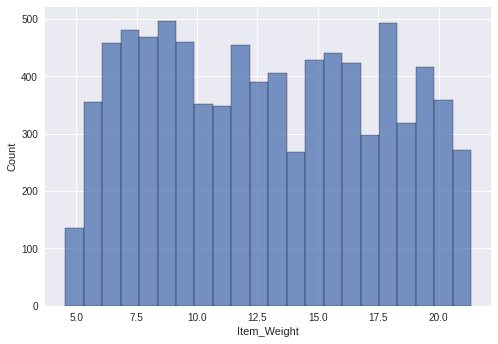

In [33]:
sns.histplot(df['Item_Weight']);

In [34]:
df['Item_Type'].values

array(['Dairy', 'Soft Drinks', 'Meat', ..., 'Health and Hygiene',
       'Snack Foods', 'Soft Drinks'], dtype=object)

In [35]:
fig = px.scatter(df, x='Item_MRP', y='Item_Outlet_Sales', size='Item_Visibility', color='Outlet_Type',
           hover_name='Item_Type', log_x=False, log_y=False, size_max=15)
fig.show()

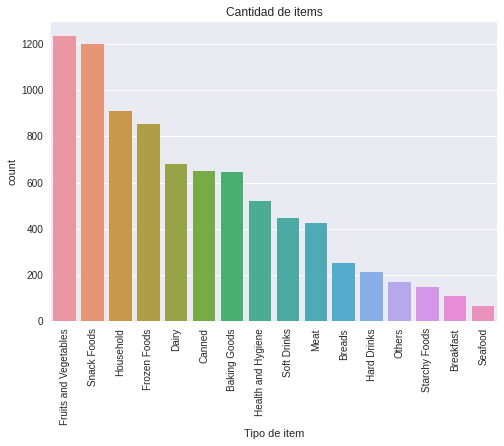

In [36]:
sns.countplot(x=df['Item_Type'], data=df, order=df['Item_Type'].value_counts().index)
plt.xlabel('Tipo de item')
plt.title('Cantidad de items')
plt.xticks(rotation = 90);

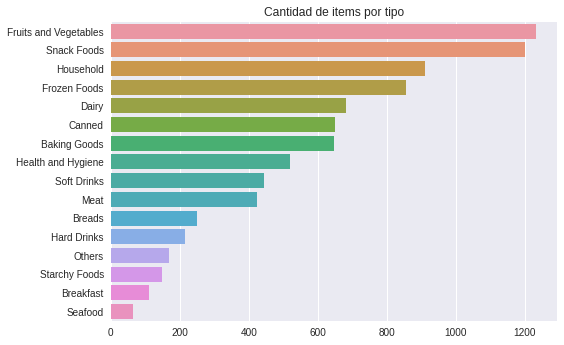

In [37]:
sns.barplot(x=df['Item_Type'].value_counts().values, y=df['Item_Type'].value_counts().index)
plt.title('Cantidad de items por tipo');

In [38]:
df['Item_Fat_Content'].value_counts().index

Index(['Low Fat', 'Regular'], dtype='object')

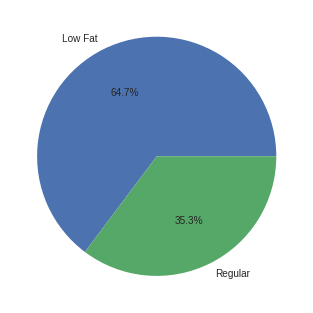

In [39]:
plt.pie(df['Item_Fat_Content'].value_counts(), labels=df['Item_Fat_Content'].value_counts().index,
        autopct='%.1f%%');

In [40]:
ventaspromedio = df.groupby('Outlet_Type')[['Item_Outlet_Sales']].mean().sort_values('Item_Outlet_Sales', ascending=False).reset_index()
ventaspromedio

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type3,3695.781505
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Grocery Store,340.031198


In [41]:
df.groupby('Outlet_Type')[['Item_Outlet_Sales']].count()

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,1082
Supermarket Type1,5577
Supermarket Type2,928
Supermarket Type3,932


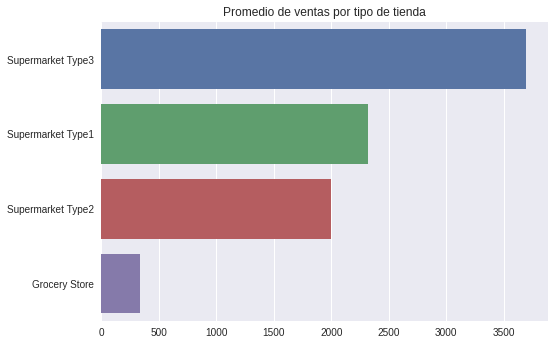

In [42]:
sns.barplot(x=ventaspromedio['Item_Outlet_Sales'], y=ventaspromedio['Outlet_Type'])
plt.xlabel('')
plt.ylabel('')
plt.title('Promedio de ventas por tipo de tienda');

In [43]:
grocerystore = df[df.Outlet_Type=='Grocery Store']
supermarket1 = df[df.Outlet_Type=='Supermarket Type1']
supermarket2 = df[df.Outlet_Type=='Supermarket Type2']
supermarket3 = df[df.Outlet_Type=='Supermarket Type3']
supermarket3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,932.000000,932.000000,932.000000,932.0,932.000000
mean,12.934533,0.058545,139.934291,1985.0,3695.781505
std,4.701562,0.043135,61.881853,0.0,2129.894781
min,4.590000,0.000000,31.290000,1985.0,241.685400
25%,8.833750,0.026045,92.985700,1985.0,2044.838250
50%,12.725000,0.048359,143.797000,1985.0,3364.953200
75%,17.200000,0.082481,184.536450,1985.0,4977.520800
max,21.350000,0.183948,265.288400,1985.0,13086.964800


In [44]:
supermarket1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000
mean,12.849509,0.060723,141.213894,1999.322933,2316.181148
std,4.637104,0.044533,62.341122,6.397596,1515.965558
min,4.555000,0.000000,31.490000,1987.000000,73.238000
25%,8.775000,0.026060,94.046200,1997.000000,1151.168200
50%,12.600000,0.049865,143.115400,1999.000000,1990.742000
75%,16.750000,0.088305,185.826600,2004.000000,3135.918000
max,21.350000,0.188620,266.888400,2007.000000,10256.649000


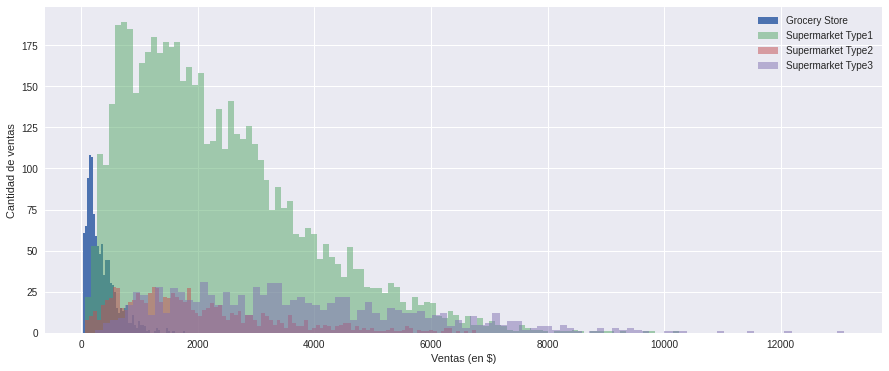

In [45]:
#Aquí podemos ver la gran cantidad de ventas que tuvieron los supermercados tipo 1
plt.figure(figsize=(15,6))
plt.hist(grocerystore['Item_Outlet_Sales'], bins=50, alpha=1, label="Grocery Store")
plt.hist(supermarket1['Item_Outlet_Sales'], bins=100, alpha=0.5, label="Supermarket Type1")
plt.hist(supermarket2['Item_Outlet_Sales'], bins=100, alpha=0.5, label="Supermarket Type2")
plt.hist(supermarket3['Item_Outlet_Sales'], bins=100, alpha=0.5, label="Supermarket Type3")
plt.xlabel('Ventas (en $)')
plt.ylabel('Cantidad de ventas')
plt.legend();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<Figure size 576x864 with 0 Axes>

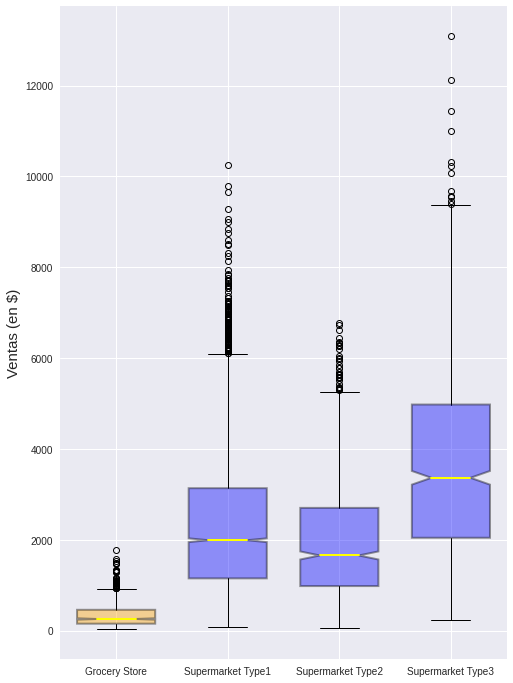

In [46]:
plt.figure(figsize = (8,12))
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,12))
boxplots = axes.boxplot([grocerystore['Item_Outlet_Sales'],
                         supermarket1['Item_Outlet_Sales'],
                         supermarket2['Item_Outlet_Sales'],
                         supermarket3['Item_Outlet_Sales']],
           notch = True,
           labels=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('orange')
plt.ylabel('Ventas (en $)', fontsize = 15);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

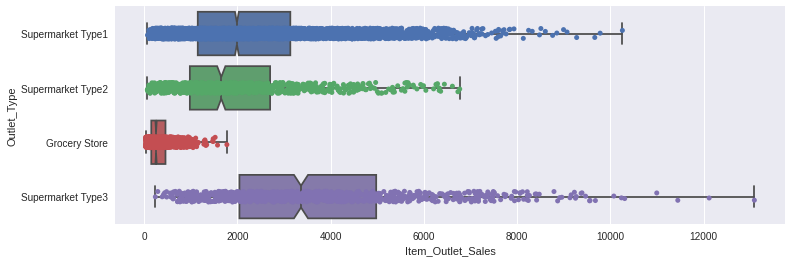

In [47]:
plt.figure(figsize = (12,4))
sns.boxplot(x=df['Item_Outlet_Sales'], y=df['Outlet_Type'], notch=True, whis=[0, 100])
sns.stripplot(x=df['Item_Outlet_Sales'], y=df['Outlet_Type']);

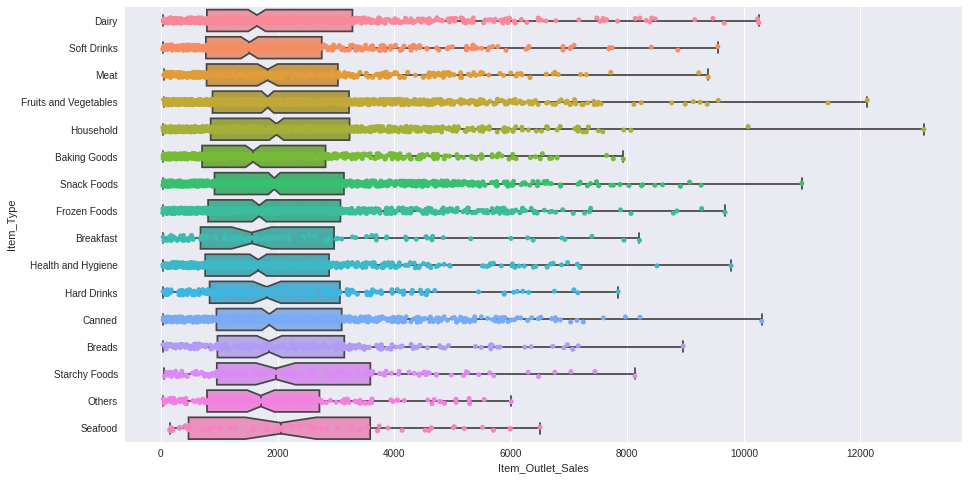

In [48]:
plt.figure(figsize = (15,8))
sns.boxplot(x=df['Item_Outlet_Sales'], y=df['Item_Type'], notch=True, whis=[0, 100]);
sns.stripplot(x=df['Item_Outlet_Sales'], y=df['Item_Type']);

In [49]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001155,-0.074325,-0.128297
Item_MRP,0.025975,-0.001155,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013426,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013168,-0.128297,0.567803,-0.049083,1.000000


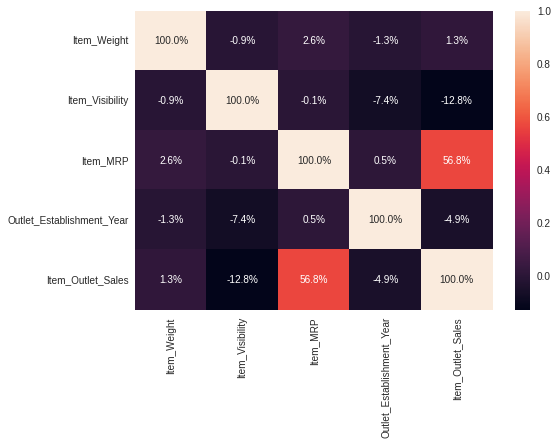

In [50]:
sns.heatmap(df.corr(), annot=True, fmt='.1%');

## **Modelo de predicción de ventas**

### **Codificación de variables**

Dado que tenemos variables categóricas en nuestro dataset, las codificaremos con el fin de que nuestro modelo de aprendizaje automático pueda trabajar con ellas.

In [53]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [55]:
encoded_df = df
encoded_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [56]:
encoded_df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
encoded_df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
encoded_df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
encoded_df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
encoded_df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
encoded_df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
encoded_df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [57]:
encoded_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,660,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1117,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1293,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Separar características y objetivo

In [58]:
X = encoded_df.drop(columns='Item_Outlet_Sales')
y = encoded_df['Item_Outlet_Sales']
print(X.shape, y.shape)

(8519, 11) (8519,)


### Dividir en un set de entrenamiento y un set de prueba

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(8519, 11) (6815, 11) (1704, 11)


## Regresión Lineal

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [62]:
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
print(lr.score(X_test, y_test))

0.5165711855167965


## K Nearest Neighbors

In [64]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)

In [65]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [66]:
print(knn.score(X_test, y_test))

0.1348020782741468
